# Initial Analysis of SYK and CK2 simulations on Folding@home (project 10485 and 10866, respectively), a collaboration with Astra Zeneca


####April 1, 2015

####This is some initial analysis of our SYK and CK2 simulations. 

##Section 0: Starting Out

In [1]:
#Import libraries

import matplotlib.pyplot as plt
import mdtraj as md
import seaborn as sns
import glob
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.linalg.calc_lwork` is deprecated!

calc_lwork was an internal module in Scipy and has been removed.

Several functions in scipy.linalg.lapack have *_lwork variants
that perform the lwork calculation (from Scipy >= 0.15.0), or
allow passing in LWORK=-1 argument to perform the computation.


  warnings.warn(depdoc, DeprecationWarning)


###Longest SYK sim

In [3]:
#Import longest trajectory of 

t = md.load("10485/run2-clone0.h5")

The timestep for these simulations is 2 fs (can be found in integrator.xml). And the write frequency is every 125000 steps (can be found in project.xml). This means that each frame is 250 ps.

In [4]:
frame = np.arange(len(t))[:, np.newaxis]

# Using 0.25 so that units are in ns.
time = frame * .250
len(t)

2120

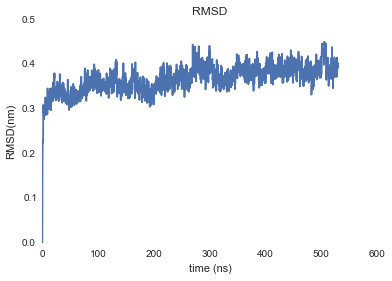

In [5]:
rmsd = md.rmsd(t,t,frame=0)
plt.plot(time,rmsd)
plt.xlabel('time (ns)')
plt.ylabel('RMSD(nm)')
plt.title('RMSD')

What is the total amount of sim time for SYK?

In [6]:
t = md.load(glob.glob("10485/*.h5"))
frame = np.arange(len(t))[:, np.newaxis]
# Using 0.25 so that units are in ns.
time = frame * .250
total_time = time[-1] * 1e-3

print "Total simulation time is %s us." % ''.join(map(str, total_time)) 

Total simulation time is 23.6295 us.


###Longest CK2 sim.

In [7]:
#Import longest trajectory of 

t = md.load("10486/run0-clone20.h5")

In [8]:
frame = np.arange(len(t))[:, np.newaxis]

# Using 0.25 so that units are in ns.
time = frame * .250
len(t)

1760

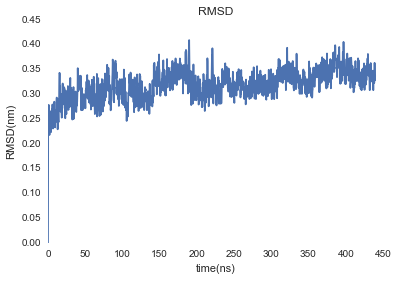

In [9]:
rmsd = md.rmsd(t,t,frame=0)
plt.plot(time,rmsd)
plt.xlabel('time(ns)')
plt.ylabel('RMSD(nm)')
plt.title('RMSD')

What is the total amount of sim time for CK2?

In [16]:
t = md.load(glob.glob("10486/*.h5"))
frame = np.arange(len(t))[:, np.newaxis]
# Using 0.25 so that units are in ns.
time = frame * .250
total_time = time[-1] * 1e-3

print "Total simulation time is %s us." % ''.join(map(str, total_time)) 

Total simulation time is 22.4895 us.


##Section 1: What are we looking for in terms of physiological interest? And are structures connected?

####Simulations started from these structures:

#####SYK: 3SRV_B, 4FL3_A, 4FL2_A

3SRV is representative of more commonly found structures.
SYK is interesting because it has an atypical imatinib binding mode:
http://www.ncbi.nlm.nih.gov/pubmed/15507431
It also has some allosteric modulators:
http://www.ncbi.nlm.nih.gov/pubmed/15507431


#####CK2: 1JWH_A & 4DGL_C

1JWH is representative of more commonly found structures.
CK2 is interesting because of a strange (prolonged?) off rate inhibitor found by AZ (how this collaboration got started). That has only a small chemical difference from a fast off-rate inhibitor. It would be difficult to contribute much to our physiological understanding before adding ligand.

#####Should ask John Manchester/Mihil about references to check out for CK2.

Hmmmm... Actually upon looking at this, it seems like there is only one starting structure of CK2 (there is only a run0). It is started from 4DGL_C (as found in /data/choderalab/fah/initial-models/projects/CSK21_HUMAN_D0/RUN0/template.txt).


####Looking at RMSD plot differences from 'common' structure.

####SYK:

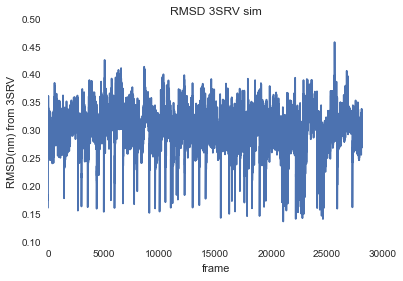

In [19]:
#Import all trajectories for run0 which is starting from conformation 3SRV.
#Import all trajectories for run1 which is starting from conformation 4FL2_A.
#Import all trajectories for run2 which is starting from conformation 4FL3_A.
#Information can be found in: /data/choderalab/fah/initial-models/projects/KSYK_HUMAN_D0

t0 = md.load(glob.glob("10485/run0*.h5"))
t1 = md.load(glob.glob("10485/run1*.h5"))
t2 = md.load(glob.glob("10485/run2*.h5"))

# Load an initial structure to compare to.
# These can be found in:
# /cbio/jclab/projects/parton/kinome-ensembler-SYK_HER2_CK2_DDR1_MEK/models/KSYK_HUMAN_D0/KSYK_HUMAN_D0_3SRV_B
t_3SRV = md.load("starting_structures/explicit-refined_3SRV.pdb")
protein_indices = t_3SRV.top.select("protein")
t_3SRV_protein = t_3SRV.atom_slice(protein_indices)
t_4FL2 = md.load("starting_structures/explicit-refined_4FL2_A.pdb")
protein_indices = t_4FL2.top.select("protein")
t_4FL2_protein = t_4FL2.atom_slice(protein_indices)

#topS = t_3SRV.topology
#t_SRV_protein = topS.select("protein")
#t_4FL2 = md.load("starting_structures/explicit-refined_4FL2_A.pdb")
#topF = t_4FL2.topology
#t_4FL2_protein = topF.select("protein")

rmsd_0S = md.rmsd(t0,t_3SRV_protein)
plt.plot(rmsd_0S)
plt.xlabel('frame')
plt.ylabel('RMSD(nm) from 3SRV')
plt.title('RMSD 3SRV sim')

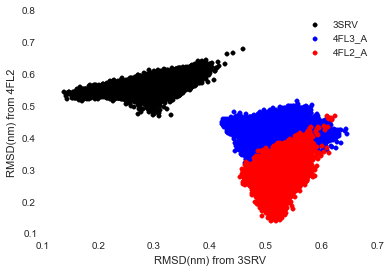

In [23]:
#Loook at how all three sims overlap, only looking at differences from.

rmsd_0S = md.rmsd(t0,t_3SRV_protein)
rmsd_0F = md.rmsd(t0,t_4FL2_protein)
rmsd_1S = md.rmsd(t1,t_3SRV_protein)
rmsd_1F = md.rmsd(t1,t_4FL2_protein)
rmsd_2S = md.rmsd(t2,t_3SRV_protein)
rmsd_2F = md.rmsd(t2,t_4FL2_protein)

plt.scatter(rmsd_0S,rmsd_0F,color='black',label="3SRV")
plt.scatter(rmsd_2S,rmsd_2F,color='blue',label="4FL3_A")
plt.scatter(rmsd_1S,rmsd_1F,color='red',label="4FL2_A")
plt.xlabel('RMSD(nm) from 3SRV')
plt.ylabel('RMSD(nm) from 4FL2')
plt.legend()

####CK2:

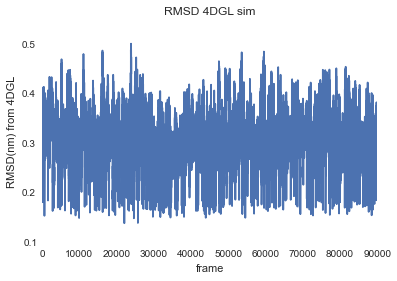

In [24]:
#Import all trajectories for run0 which is starting from conformation 4DGL_C.

t0 = md.load(glob.glob("10486/run0*.h5"))

# Load PDBs.
t_4DGL_C = md.load("starting_structures/explicit-refined_4DGL.pdb")
protein_indices = t_4DGL_C.top.select("protein")
t_4DGL_protein = t_4DGL_C.atom_slice(protein_indices)

rmsd_0D = md.rmsd(t0,t_4DGL_protein)
plt.plot(rmsd_0D)
plt.xlabel('frame')
plt.ylabel('RMSD(nm) from 4DGL')
plt.title('RMSD 4DGL sim')

In [25]:
# Don't have a second structure for CK2. It crashed during explicit refinement apparently.